# Probability and Random Processes


## Introduction

In this chapter, you'll learn about how to use randomness and probability with code.

If you're running this code (either by copying and pasting it, or by downloading it using the icons at the top of the page), you may need to the packages it uses by, for example, running `pip install packagename` on your computer's command line. (If you're not sure what a command line is, take a quick look at the basics of coding chapter.)

### Imports

First we need to import the packages we'll be using

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Set max rows displayed for readability
pd.set_option("display.max_rows", 6)
# Plot settings
plt.style.use(
    "https://github.com/aeturrell/coding-for-economists/raw/main/plot_style.txt"
)

## Probability (definitions)

Let's get the jargon and definitions out of the way first, then we'll find out a bit about random numbers in code, then we'll actually see how to *use* random numbers for probability!

Any probabilistic event can be considered to have three components: the sample space of possible outcomes $\Omega$, the set of possible events $\mathcal{F}$, and a probability measure $P$. Furthermore, $A$ is often used to denote a subset of $\Omega$ and $A^c$ the complement of $A$, while individual events in $\Omega$ are $\omega$. In the classic example of rolling a 6-sided fair die once, $\Omega = \{1, 2, 3, 4, 5, 6\}$. If $A = \{1, 2, 3\}$ then, by definition of $\Omega$, $A^c = \{4, 5, 6\}$. The probability measure of any sample space satisfies $P(\Omega)=1$ and $P(\varnothing)$ = 0.

The most important examples of probability that arise in economics are **continuous random variables** and **discrete random variables**. A random variable is a function $X: \Omega \rightarrow \mathbb{R}$ such that $\{ \omega \in \Omega: X(w) \leq x\} \in \mathcal{F}$ for each $x\in\mathbb{R}$. All this is saying is that for every possible outcome, the random variable is a mapping of that outcome into a well-defined space of real numbers. It makes the connection between outcomes, events, and real numbers.

Now we'll go on to more practical matters: discrete and continuous random variables.

### Discrete random variables

A random variable is discrete if it only takes values in a countable subset of $\mathbb{R}$; think the integers, or $x\in\{0, 1\}$. The distribution of such values is given by the **probability mass function**, or pmf. The pmf is an object that tells us the probabilty mass given to specific outcomes. The more precise defintion is

$$
p(x_i) = P(X=x_i) = P(\underbrace{\{\omega\in \Omega\ |\ X(\omega) = x_i\}}_{\text{set of outcomes resulting in}\ X=x_i}).
$$

It has a few key properties. $p:\mathbb{R} \rightarrow [0, 1]$, the probability of all outcomes sum to 1, ie $\displaystyle{\sum_{x_i} p(x_i)}=1$, the probabilities satisfy $p(x_i) \geq 0  \quad\forall x_i$, and $P(X \in A) = \displaystyle\sum_{x_i \in A} p(x_i)$. A fair six-sided die is the canonical example.

Another useful object is the **cumulative distribution function**, which is defined generally as $\text{cdf}(x) = P(X \leq x)\quad \forall x \in \mathbb{R}$. For probability mass functions, this becomes

$$
\text{cdf}(x) = P(X\leq x) = \sum_{x_i\leq x} p(x_i)
$$



### Continuous random variables

Continuous random variables are functions such that $f: \mathbb{R} \rightarrow [0, \infty)$ is a **probability density**. Probability density functions are to continuous random variables what PMFs are to discrete random variables, though there are some important differences that can trip up even the most careful. They are defined as follows: the probability of $X$ taking a value betwen $a$ and $b$ is given by

$$
P(a \leq X \leq b) = \displaystyle\int_a^b f(x) dx
$$

where $f(x)\geq 0 \quad \forall x \in \mathbb{R}$, $f$ is piecewise continuous, and $\displaystyle\int_{-\infty}^\infty f(x) dx = 1$.

The big mistake that people sometimes make is to think that $f(x)$ is a probability but it's not! The clue is in the name; $f(x)$ is a probability *density*, while $f(x) dx$ is a probability. This means you only get a probability from $f(x)$ once you integrate it. It also means that $f(x)$ has units of $1/x$. For example, if $x$ is wages, $f(x)$ has units of $\text{wages}^{-1}$.

Cumulative distribution functions are also defined for pdfs:

$$
\text{cdf}(x) = P(X\leq x) = \int\limits^x_{-\infty}\! f(x')\, dx'
$$



## Distribution functions

Let's now see how code can help us when working with distributions, beginning with the probability mass function. As an example, let's take a look at the binomial distribution. This is defined as

$$
f(k; n, p) = \binom{n}{k} p^k q^{n-k}
$$

with $q=1-p$. Say we have a process with a 30% chance of success; $f$ tells us how likely it is to get $k$ successes out of $n$ independent trials.

**scipy** has analytical functions for a really wide range of distributions and probability mass functions; you can [find them here](https://docs.scipy.org/doc/scipy/reference/stats.html). To get the binomial, we'll use `scipy.stats.binom`. 

There are two ways to call different distributions. You can declare a random variable object first, for example, `rv = binom(n, p)`, and then call `rv.pmf(k)` on it. Or you can call it all in one go via `binom.pmf(k, n, p)`. Here it is using the former:

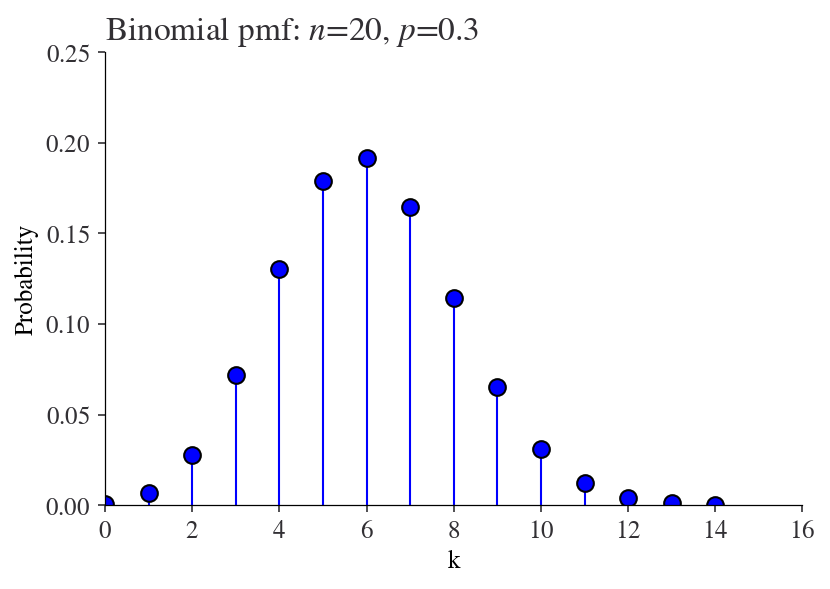

In [3]:
n = 20
p = 0.3
rv = st.binom(n, p)
k = np.arange(0, 15)

# Plot
fig, ax = plt.subplots()
ax.plot(k, rv.pmf(k), "bo", ms=8)
ax.vlines(k, 0, rv.pmf(k), colors="b", linestyles="-", lw=1)
ax.set_title(f"Binomial pmf: $n$={n}, $p$={p}", loc="left")
ax.set_xlabel("k")
ax.set_ylabel("Probability")
ax.set_xlim(0, None)
ax.set_ylim(0, None)
plt.show()

Likewise, we can access the **cumulative distribution function**:

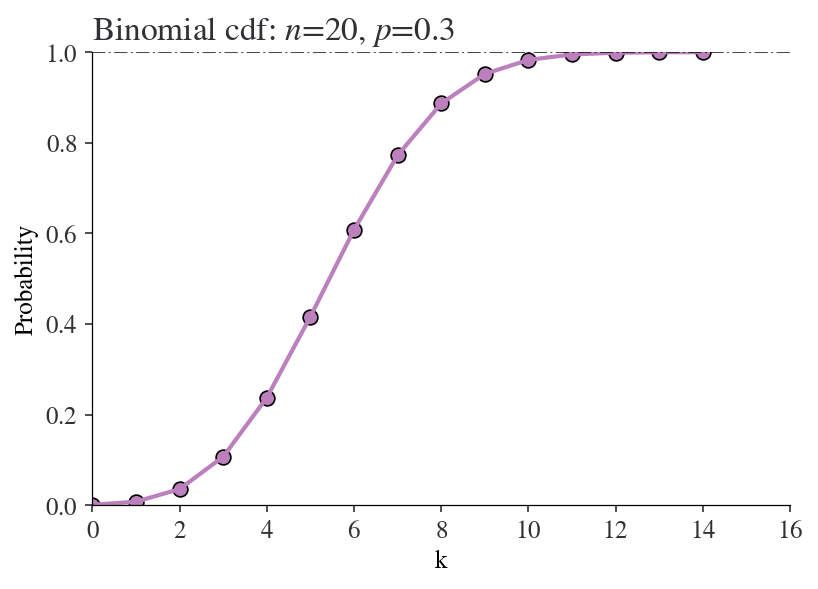

In [4]:
fig, ax = plt.subplots()
ax.plot(k, rv.cdf(k))
ax.scatter(k, rv.cdf(k), s=50)
ax.axhline(1, color="k", alpha=0.7, linestyle="-.", lw=1)
ax.set_title(f"Binomial cdf: $n$={n}, $p$={p}", loc="left")
ax.set_xlabel("k")
ax.set_ylabel("Probability")
ax.set_xlim(0, None)
ax.set_ylim(0, 1);

Of course, **continuous random variables** are also covered. To get a wide range of pdfs, the commands are `scipy.stats.distributionname.pdf(x, parameters=)`.

Let's see a couple of examples. The lognormal distribution is given by $f(x, s) = \frac{1}{sx\sqrt{2\pi}}\exp\left(-\frac{\ln^2(x)}{2s^2}\right)$ and the gamma by $f(x, a) = \frac{x^{a-1}e^{-x}}{\Gamma(a)}$.

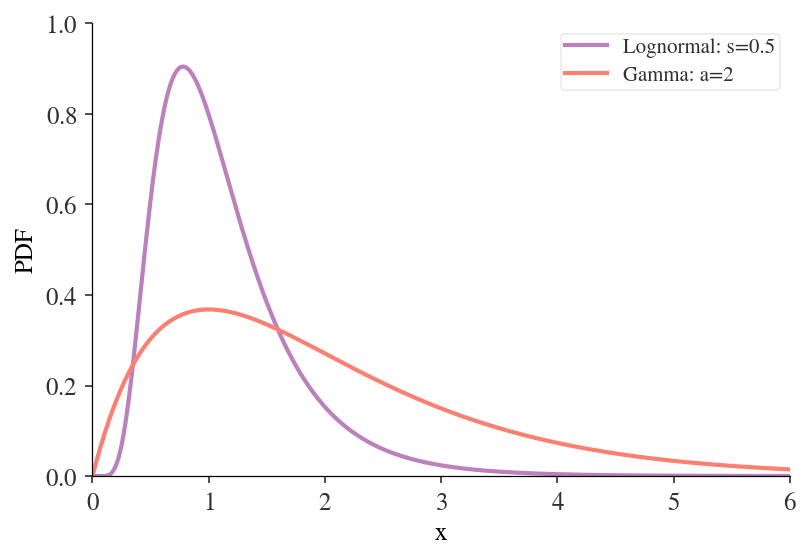

In [5]:
s = 0.5
a = 2

x = np.linspace(0, 6, 500)
fig, ax = plt.subplots()
ax.plot(x, st.lognorm.pdf(x, s), label=f"Lognormal: s={s}")
ax.plot(x, st.gamma.pdf(x, a), label=f"Gamma: a={a}")
ax.set_xlabel("x")
ax.set_ylabel("PDF")
ax.set_ylim(0, 1)
ax.set_xlim(0, 6)
ax.legend()
plt.show()

Likewise, to get the cdf for a given distribution, the command is `scipy.stats.distributionname.cdf(x, parameters=)`. Here are the ones for the lognormal and gamma.

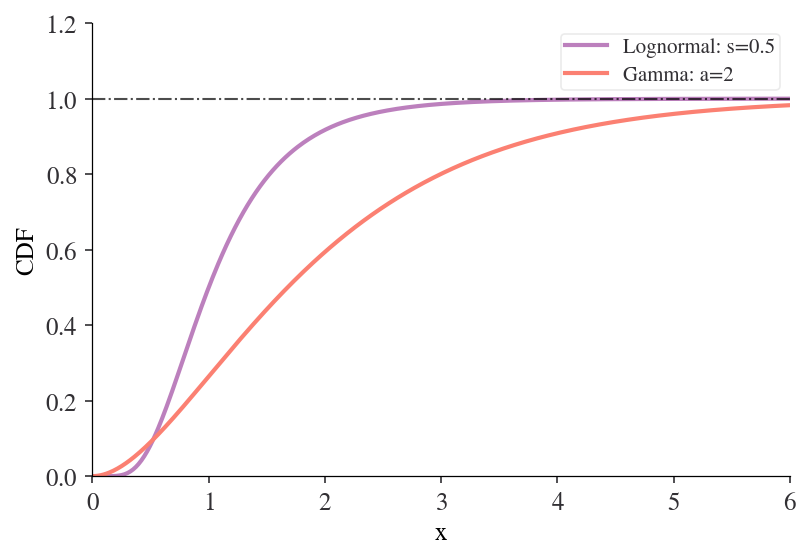

In [6]:
x = np.linspace(0, 6, 500)
fig, ax = plt.subplots()
ax.plot(x, st.lognorm.cdf(x, s), label=f"Lognormal: s={s}")
ax.plot(x, st.gamma.cdf(x, a), label=f"Gamma: a={a}")
ax.set_xlabel("x")
ax.set_ylabel("CDF")
ax.set_ylim(0, 1.2)
ax.set_xlim(0, 6)
ax.axhline(1, color="k", alpha=0.7, linestyle="-.", lw=1)
ax.legend()
plt.show()

### Other properties of PMFs and PDFs

A range of functions are available for PMFs and PDFs in addition to the ones we've seen already. For a pmf or pdf, we can call `median`, `mean`, `var`, `std`, and so on. Let's see an example with two of the most useful: interval and percentile.

`interval(alpha, ...)` gives the endpoints of the range around the median that contain alpha percent of the distribution. `ppf(q, ...)` gives the quantiles of a given distribution, defined as $F(x) = P(X\leq x) = q$.

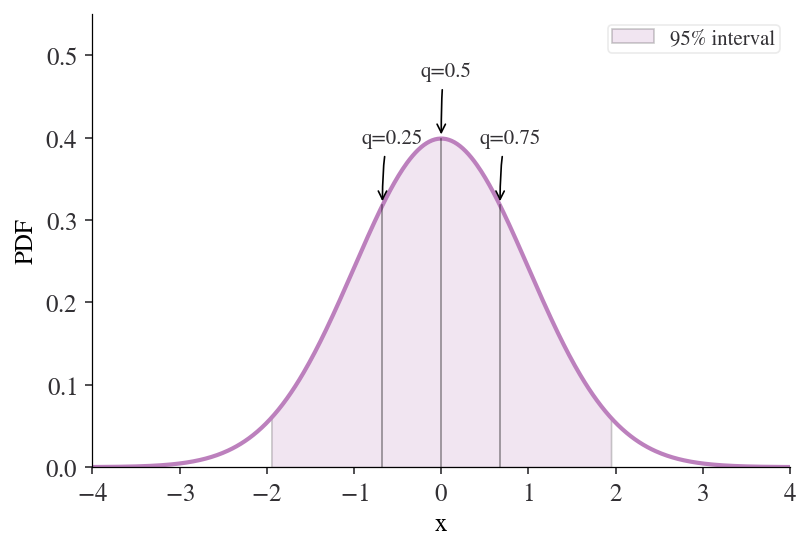

In [7]:
x = np.linspace(-4, 4, 500)
y = st.norm.pdf(x)

# Get percentiles
quantiles = [0.25, 0.5, 0.75]
probs = [st.norm.ppf(q) for q in quantiles]
# Interval
x1, x2 = st.norm.interval(0.95)
cut_x = x[((x > x1) & (x < x2))]
cut_y = y[((x > x1) & (x < x2))]

# Plot
fig, ax = plt.subplots()
ax.plot(x, y)
for i, prob in enumerate(probs):
    ax.plot([prob, prob], [0, st.norm.pdf(prob)], lw=0.8, color="k", alpha=0.4)
    ax.annotate(
        f"q={quantiles[i]}",
        xy=(prob, st.norm.pdf(prob)),
        xycoords="data",
        xytext=(-10, 30),
        textcoords="offset points",
        arrowprops=dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90"),
        # fontsize=12,
    )
ax.fill_between(cut_x, 0, cut_y, alpha=0.2, label=r"95% interval")
ax.set_xlabel("x")
ax.set_ylabel("PDF")
ax.set_xlim(-4, 4)
ax.set_ylim(0, 0.55)
ax.legend()
plt.show()

## Randomness for computers

Computers love instruction and hate ambiguity. As such, randomness is quite tricky for them. So tricky, that no computer is able to produce *perfectly* random numbers but instead only has a **pseudo-random number generator**, or PRNG. As far as humans go, these are pretty good and modern ones are so good that using them is unlikely to be an issue unless you really are working at the frontiers of the science of randomness.

**numpy** uses a PRNG that's a 64-bit Permuted Congruential Generator, though you can access other generators too. Here's how to call it to generate $x \thicksim \mathcal{U}(0,1)$,

In [8]:
from numpy.random import default_rng

rng = default_rng()
rng.random(size=2)

array([0.8840481, 0.7555799])

In the above, `rng` is an object that you can call many random number generating functions on. Here we just asked for 2 values drawn from between 0 and 1. 

If you are using **pandas** for your analysis, then it comes with random sampling methods built in under the guise of `df.sample()` for a dataframe `df`. This has keywords for number of samples (`n`) **or** fraction of all rows to sample (`frac`) and whether to use `weights=`. You can also pass a PRNG to the `.sample()` method.

Another really useful random generator provides integers and is called `integers`. Let's see this but in the case where we're asking for a more elaborately shaped output array, a 3x3x2 dimensional tensor:

In [9]:
min_int, max_int = 1, 20
rng.integers(min_int, max_int, size=(3, 3, 2))

array([[[18,  5],
        [ 2, 17],
        [ 6, 13]],

       [[ 6,  4],
        [10, 15],
        [ 3,  7]],

       [[ 6, 13],
        [11, 10],
        [ 8,  3]]])

One random function that is incredibly useful is `choice`, which returns a random selection from another type of object. Here, we show this by passing a list of letters and asking for two of them to be picked randomly:

In [10]:
rng.choice(["a", "b", "c", "d", "e", "f"], size=2)

array(['a', 'f'], dtype='<U1')

This choice can also be made with a given probability. Let's make a very large number of draws with an exponentially falling probability and see what we get!

In [11]:
num_draws = 1000
# Create 6 values spread across several orders of magnitude
prob = np.logspace(0, -3, num=6)
# Normalise this to 1
prob = prob / sum(prob)
# Choose the letters
letter_choices = rng.choice(["a", "b", "c", "d", "e", "f"], size=num_draws, p=prob)

To make it easy to see what happened, we'll use the in-built collections library's `Counter` function to go from a long list of all of the letters to a dictionary of letters and counts of how frequently they occurred. We'd like to have the bars in order but `Counter` doesn't do that automatically, so we have to do a few things around the `counts` dictionary to change this.

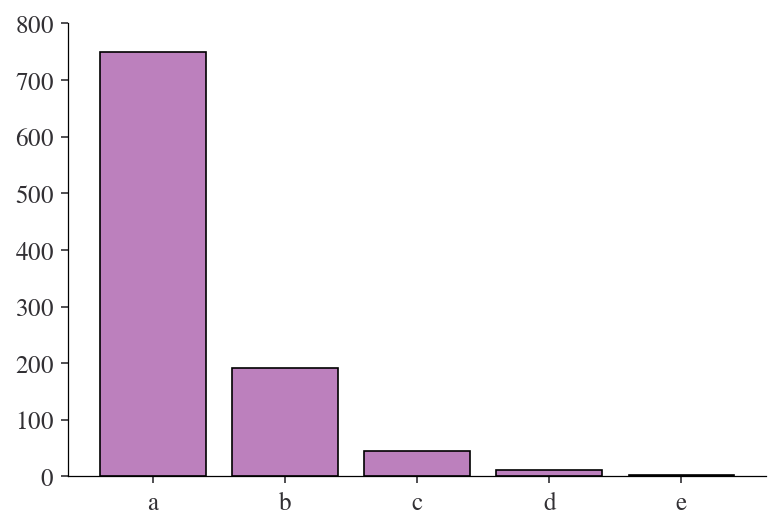

In [12]:
from collections import Counter, OrderedDict

counts = OrderedDict(sorted(Counter(letter_choices).items()))
plt.bar(counts.keys(), counts.values());

As expected, 'a' was chosen many more times than 'b', and so on. In fact, if we divided the counts by `num_draws`, we would find that the probability of each letter was converging toward the probabilities we provided in `prob`.

Another useful random function to know about is `shuffle`, and you can probably guess what it does! But note that it does the shuffling to the list you put in, rather than returning a new, modified list. Here's an example:

In [13]:
plain_list = ["This", "list", "is", "well", "ordered."]
rng.shuffle(plain_list)
plain_list

['list', 'well', 'This', 'ordered.', 'is']

### Reproducibility

If you need to create random numbers reproducibly, then you can do it by setting a seed value like this:

In [14]:
from numpy.random import Generator, PCG64

seed_for_prng = 78557
prng = Generator(PCG64(seed_for_prng))
prng.integers(0, 10, size=2)

array([8, 3])

In [15]:
prng = Generator(PCG64(seed_for_prng))
prng.integers(0, 10, size=2)

array([8, 3])

The seed tells the generator where to start (PCG64 is the default generator), so by passing the same seed in we can make the random numbers begin in the same place. The `prng` above can also be passed to some functions as a keyword argument.

### Random numbers drawn from distributions

Using **numpy**, we can draw samples from distributions using the `prng.distribution` syntax. One of the most common distributions you might like to draw from is the uniform, for example

$$
x \thicksim \mathcal{U}(0, 10)
$$

with, here, a minimum of 0 and a maximum of 10. Here's the code:



In [16]:
prng.uniform(low=0, high=10, size=3)

array([8.7920456 , 9.8030891 , 2.10091803])

Let's see how to draw from one other important distribution function: the Gaussian, or normal, distribution $x \thicksim \mathcal{N}\left(\mu, \sigma\right)$ and check that it looks right. We'll actually do two different ones: a standard normal, with $\mu=0$ and $\sigma=1$, and a shifted, relaxed one with different parameters.

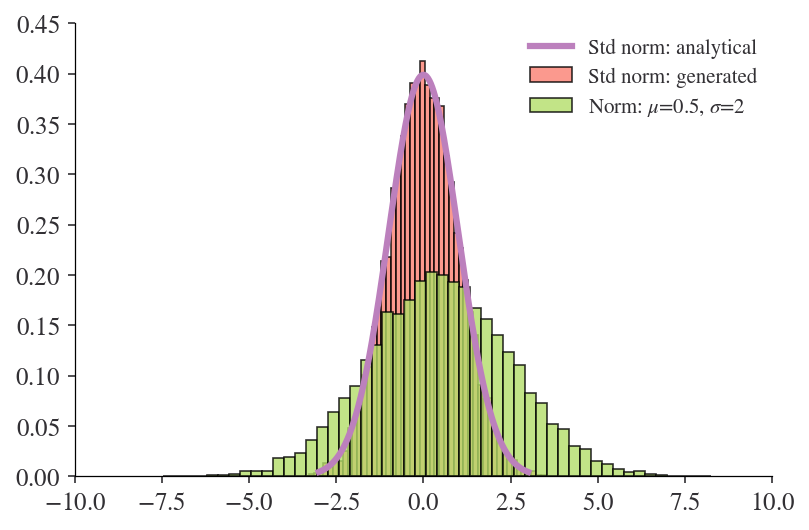

In [17]:
def gauss(x):
    """Analytical Gaussian."""
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * x ** 2)


# Make the random draws
num_draws = 10000
vals = prng.standard_normal(num_draws)

# Get analytical solution
x_axis_vals = np.linspace(-3, 3, 300)
analytic_y = gauss(x_axis_vals)

# Random draws of shifted/flatter dist
mu = 0.5
sigma = 2
vals_shift = prng.normal(loc=mu, scale=sigma, size=num_draws)

fig, ax = plt.subplots()
ax.plot(x_axis_vals, analytic_y, label="Std norm: analytical", lw=3)
ax.hist(vals, bins=50, label="Std norm: generated", density=True, alpha=0.8)
ax.hist(
    vals_shift,
    bins=50,
    label=f"Norm: $\mu$={mu}, $\sigma$={sigma}",
    density=True,
    alpha=0.8,
)
ax.legend(frameon=False)
plt.show()

### The Monte Carlo Method

Monte Carlo is the name of a part of Monaco that harbours a famous casino, yes, but it's also the name given to a bunch of techniques that rely on generating random numbers in order to solve problems. It's a really useful technique that entire textbooks cover and we can't hope to give it the love and attention it requires here, covering as it does Bayesian statistics, random walks, Markov switching models, Markov Chain Monte Carlo, bootstrapping, and optimisation! But what we can do is take a quick look at the very, very core code tools that can support these applications. The bottom line is that between the drawing of random variables from given **scipy** distributions we've already seen, the use of `prng.choice()`, and the use of `prng.uniform`, a lot of Monte Carlo methods are covered.

We already covered drawing random numbers from distributions already included in **scipy**.

`prng.uniform` is helpful in the following case: in the (extremely unlikely) event that there isn't a pre-built distribution available for a case where you know the analytical expression of a PDF and its CDF, a quick way to get random numbers distributed according to that PDF is to plug random numbers into the inverse cumulative distribution function. ie you plug random numbers $r$ into $\text{cdf}^{-1}(r)$ in order to generate $x \thicksim \text{pdf}$. The random numbers you plug in must come from a uniform distribution between 0 and 1.

`prng.choice()` comes into its own for simulation, one of the many applications of Monte Carlo techniques in economics. (I mean simulation loosely here; it could be an agent-based model, it could be simulating an econometric relationship.)

Let's do a very simple and canonical example of a simulation using `.choice()`: rolling a 6-sided die...

..but we want to make it a *bit* more exciting than that! Let's see two die, one that's fair (equal probability of getting any value in 1 to 6) and one that's loaded (in this case, we'll make a 6 twice as likely as other values).

For a naive estimate of the probability of a particular die score based on simulation, it's going to be

$$
\hat{p}_\omega = \frac{\text{Counts}_\omega}{\text{Total counts}}
$$

with $\omega \in \{1, 2, 3, 4, 5, 6\}$.

To simulate this, we'll use the `choice` function fed with the six values, 1 to 6, on some dice. Then we'll count the occurrences of each, creating a dictionary of keys and values with `Counter`, and then plot those.

To work out the (estimate of) probability based on the simulation, we've divided the number of throws per value by the total number of throws. You can see that with so many throws, there's quite a wedge between the chance of obtaining a six in both cases. Meanwhile, the fair die is converging to the dotted line, which is $1/6$. Note that because of the individual probabilities summing to unity, a higher probability of a six on the loaded die means that values 1 to 5 must have a lower probability than with the fair die; and you can see that emerging in the chart too.

In doing this for every possible outcome, we're effectively estimating a probability mass function.



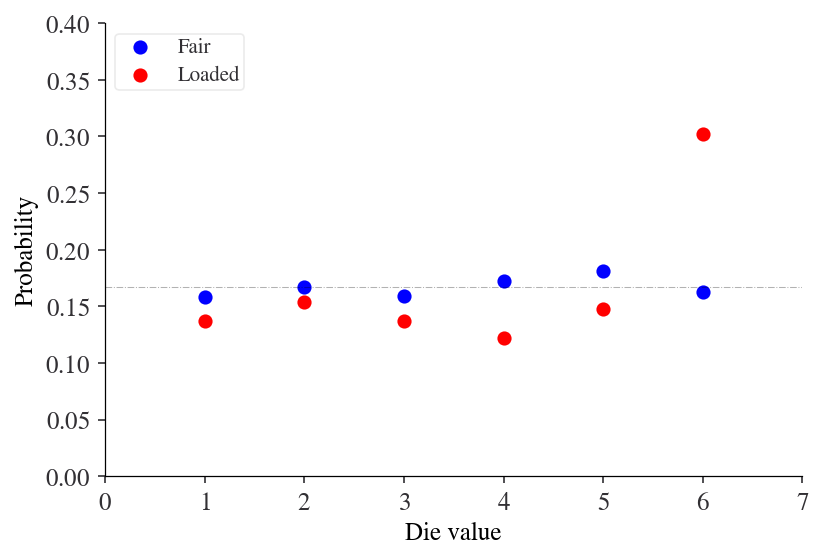

In [18]:
throws = 1000
die_vals = np.arange(1, 7)
probabilities = [1 / 7, 1 / 7, 1 / 7, 1 / 7, 1 / 7, 2 / 7]
fair_throws = prng.choice(die_vals, size=throws)
load_throws = prng.choice(die_vals, size=throws, p=probabilities)


def throw_list_to_array(throw_list):
    # Count frequencies of what's in throw list but order the dictionary keys
    counts_dict = OrderedDict(sorted(Counter(throw_list).items()))
    # Turn the key value pairs into a numpy array
    array = np.array(
        [list(counts_dict.keys()), list(counts_dict.values())], dtype=float
    )
    # Divide counts per value by num throws
    array[1] = array[1] / len(throw_list)
    return array


counts_fair = throw_list_to_array(fair_throws)
counts_load = throw_list_to_array(load_throws)

fig, ax = plt.subplots()
ax.scatter(counts_fair[0], counts_fair[1], color="b", label="Fair")
ax.scatter(counts_load[0], counts_load[1], color="r", label="Loaded")
ax.set_xlabel("Die value")
ax.set_ylabel("Probability")
ax.axhline(1 / 6, color="k", alpha=0.3, linestyle="-.", lw=0.5)
ax.legend(frameon=True, loc="upper left")
ax.set_ylim(0.0, 0.4);

Let's estimate the probability mass functions for our dice using the `cumsum` function: 

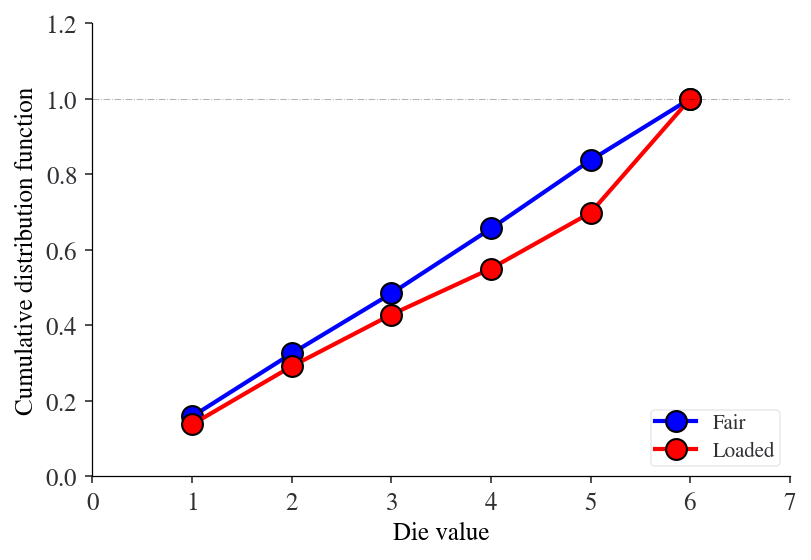

In [19]:
fig, ax = plt.subplots()
ax.plot(
    counts_fair[0],
    np.cumsum(counts_fair[1]),
    color="b",
    label="Fair",
    marker="o",
    ms=10,
)
ax.plot(
    counts_load[0],
    np.cumsum(counts_load[1]),
    color="r",
    label="Loaded",
    marker="o",
    ms=10,
)
ax.set_xlabel("Die value")
ax.set_ylabel("Cumulative distribution function")
ax.axhline(1, color="k", alpha=0.3, linestyle="-.", lw=0.5)
ax.legend(frameon=True, loc="lower right")
ax.set_ylim(0.0, 1.2);

We can see that the cumulative distribution function also tells a story about what's going on; namely, there is a lower gradient up to $i=6$, followed by a higher gradient. The two distributions are visually distinct.


## Fitting a probability distribution

Often we are in a situation where we are working with empirical data and we want to know if a particular distribution function provides a good fit for a variable. **scipy** has a neat 'fit' function that can do this for us, given a guess at a distribution. This fit is computed by maximising a log-likelihood function, with a penalty applied for samples outside of range of the distribution.

Let's see this in action with an example using synthetic data created from a noisy normal distribution:

In [20]:
size = 1000
μ, σ = 2, 1.5
# Generate normally dist data
data = prng.normal(loc=μ, scale=σ, size=size)
# Add noise
data = data + prng.uniform(-0.5, 0.5, size)
# Show first 5 entries
data[:5]

array([2.53190427, 1.13302196, 2.32422659, 2.55347475, 1.40697692])

/opt/anaconda3/envs/codeforecon/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


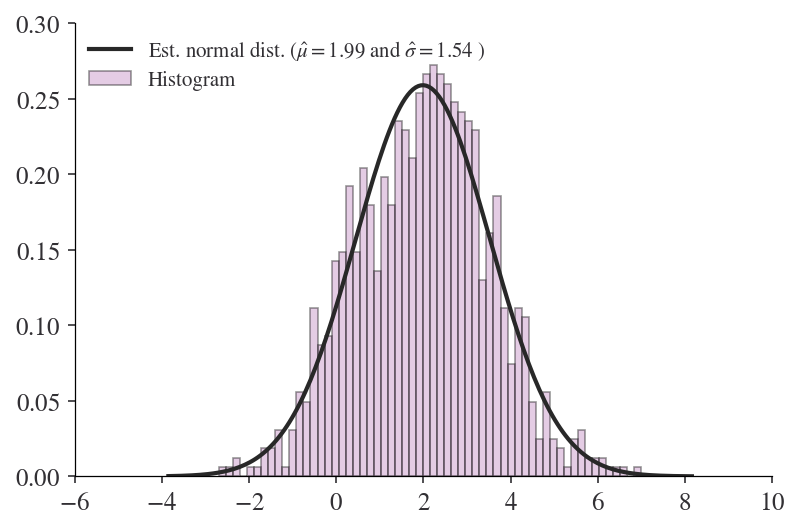

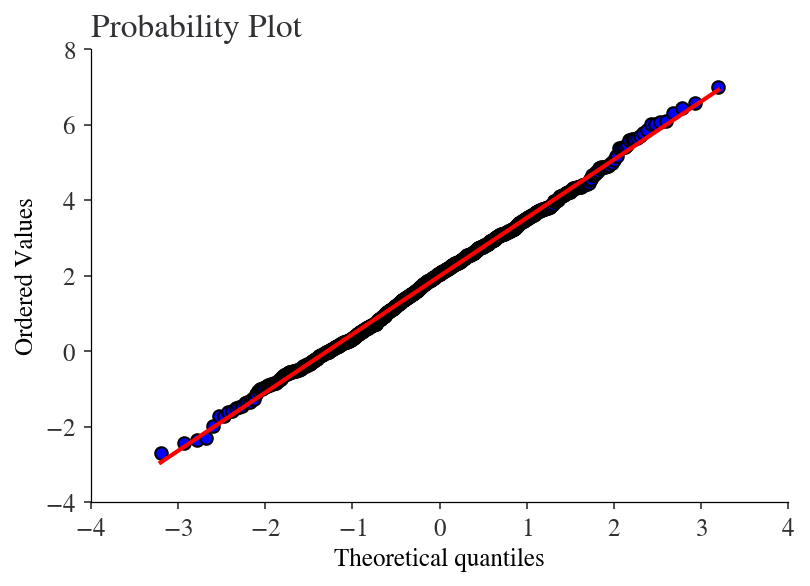

In [21]:
# Plot a histogram of the data and fit a normal distribution
sns.distplot(data, bins=60, kde=False, fit=st.norm)
# Get the fitted parameters as computed by scipy
(est_loc, est_scale) = st.norm.fit(data)
plt.legend(
    [
        f"Est. normal dist. ($\hat{{\mu}}=${est_loc:.2f} and $\hat{{\sigma}}=${est_scale:.2f} )",
        "Histogram",
    ],
    loc="upper left",
    frameon=False,
)
fig = plt.figure()
res = st.probplot(data, plot=plt)
plt.show();

As you can see, in this case the estimate $\mu$ and $\sigma$ are pretty close to the true values. The probability plot, the second chart shown, is very useful in practice because it shows how the often problematic tails are behaving.

## Review

In this very short introduction to probability and random processes with code, you should have learned how to:

- ✅ use a wide range of probability density functions and probability mass functions from **scipy**;
- ✅ use a psuedo-random number generator for drawing samples from distributions (and more!);
- ✅ use a psuedo-random number generator reproducibly; 
- ✅ use **scipy** to fit data to a given distribution using maximum likelihood estimation; and
- ✅ perform simulations using a psuedo-random number generator.